## ETL de datos
En el presente notebook se realiza el desarrollo de todo el etl necesario para unificar los datasets de entrada del proyecto 4 - Informe final de carrera. Se generará un archivo csv final que se tomará como input del modelo

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os 
import glob
import numpy as np
from scipy import interpolate

In [132]:
sns.set_theme(style='darkgrid', palette='mako', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [133]:
# Defino todos los nomrbres 
años=np.arange(2009,2021)
list_of_names=[]
dataframes_list = []
for i in años:
    list_of_names.append('Datasets/flujo-vehicular-'+str(i))
print(list_of_names)

['Datasets/flujo-vehicular-2009', 'Datasets/flujo-vehicular-2010', 'Datasets/flujo-vehicular-2011', 'Datasets/flujo-vehicular-2012', 'Datasets/flujo-vehicular-2013', 'Datasets/flujo-vehicular-2014', 'Datasets/flujo-vehicular-2015', 'Datasets/flujo-vehicular-2016', 'Datasets/flujo-vehicular-2017', 'Datasets/flujo-vehicular-2018', 'Datasets/flujo-vehicular-2019', 'Datasets/flujo-vehicular-2020']


In [134]:
## Agregamos todos los DF a una lista 
for i in range(len(list_of_names)):
    temp_df = pd.read_csv(list_of_names[i]+".csv", sep =',')
    dataframes_list.append(temp_df)

In [135]:
## Modificamos los nombres de las columnas
for i in (dataframes_list):
               i= map(str.lower,i.columns)

In [136]:
columnas_datasets =[]
for i in (dataframes_list):
    columnas_datasets.append(i.columns.to_list())
columnas_df=pd.DataFrame(columnas_datasets)
columnas_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
1,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
2,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
3,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
4,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
5,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
6,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
7,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None
8,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None
9,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None


Como podemos observar las columnas son distintas y tienen distintos nombres, por lo que vamos a proceder a modificar y unificar los data sets 
El listado de columnas a dejar seran :
1. Periodo
2. fecha (fecha de la medicion)
3. Hora (para los archivos que tienen hora inicio y fin se tomará la hora de inicio)
4. dia 
5. estacion
6. tipo_vehículo
7. forma_pago
8. cantidad_pasos

In [137]:
##Renombramos las columnas de hora_inicio para que quede igual en todos los dataframes
for i in dataframes_list:
    i=i.rename(columns={'hora_inicio':'hora'},inplace=True)

In [138]:
## Verificamos los nombres y columnas de todos los dataframes listados
columnas_datasets2 =[]
for i in (dataframes_list):
    columnas_datasets2.append(i.columns.to_list())
columnas_df2=pd.DataFrame(columnas_datasets2)
columnas_df2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
1,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
2,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
3,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
4,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
5,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
6,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None,None,None
7,periodo,fecha,hora,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None
8,periodo,fecha,hora,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None
9,periodo,fecha,hora,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,None,None,None


In [139]:
##Seleccionamos solamente las columnas mencionadas anteriormente  
columnas=["periodo","fecha","dia","hora","estacion","tipo_vehiculo","forma_pago","cantidad_pasos"]
data_frame_new=[]
for i in dataframes_list:
    data_frame_new.append(i[columnas])

In [140]:
## Consolidamos el dataframe en uno solo
df_total=pd.concat(dataframes_list)

In [141]:
df_total["periodo"] = pd.to_numeric(df_total["periodo"],downcast='integer')
df_total["fecha"] = pd.to_datetime(df_total["fecha"])
df_total["cantidad_pasos"] = pd.to_numeric(df_total["cantidad_pasos"],downcast='integer')
df_total["hora"] = pd.to_numeric(df_total["hora"],downcast='integer')

In [142]:
##Estandarizamos los nombres de las estaciones 
df_total.estacion=df_total['estacion'].str.lower()
# df_total.to_csv('Dataset_Completo.csv')

In [143]:
mask=np.logical_and(df_total.estacion=='illia',df_total.forma_pago=='EFECTIVO')
df_total=df_total[mask]

## Continuación del analisis exploratorio
En esta sección se pretende obtener un poco más del analisis exploratorio obtenido en el primer desarrollo, ya que se realizará sobre el dataset historico, y te intentará explorar otras dimensiones no exploradas en el primer entregable. 

### Cantidad de Pasos por fecha

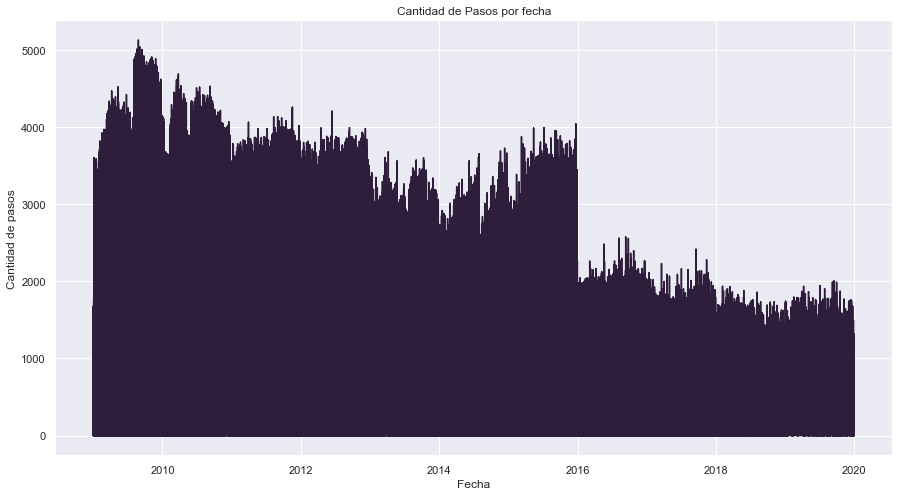

In [144]:
plt.figure(figsize = (15,8))
plt.plot(df_total.fecha, df_total.cantidad_pasos)
plt.title("Cantidad de Pasos por fecha")
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

En este gráfico podes observar la distribucion general de nuestra serie de tiempo, pudiendo obtener un pantallazo de como estan nuestros datos. Para garantizar que esto sea correcto vamos a rezamplear el dataframe y graficarlo de forma diaria. 

In [145]:
#Agrupamos los datos por dìa y volvemos a graficar 
df_diario = df_total.resample('D', on = 'fecha').sum()
## Verificamos las columnas 
df_diario.interpolate()
df_diario.head()

,periodo,hora,cantidad_pasos,hora_fin,dia_fecha
fecha,,,,,
2009-01-01,194873.0,1171.0,23250.0,0.0,0.0
2009-01-02,212954.0,1187.0,28239.0,0.0,0.0
2009-01-03,216972.0,1262.0,27148.0,0.0,0.0
2009-01-04,225008.0,1313.0,29781.0,0.0,0.0
2009-01-05,229026.0,1281.0,48577.0,0.0,0.0


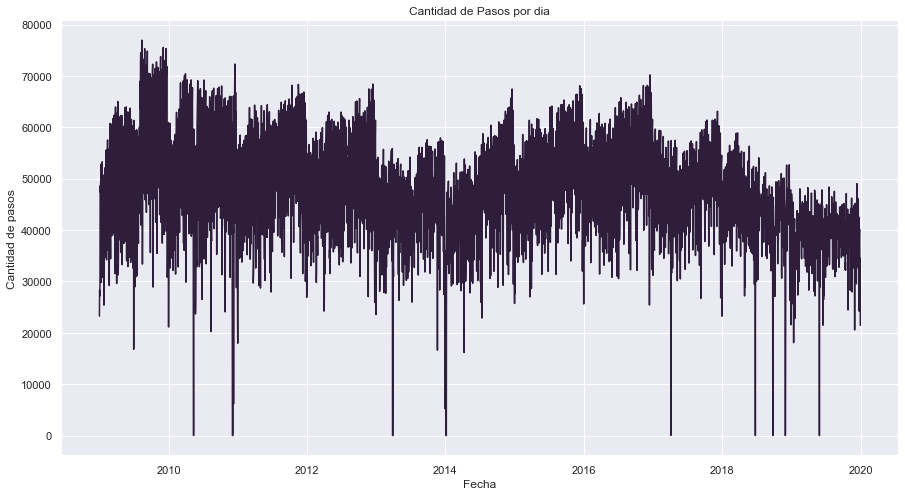

In [146]:
##Graficamos nuevamente
plt.figure(figsize = (15,8))
plt.plot(df_diario.index, df_diario.cantidad_pasos)
plt.title("Cantidad de Pasos por dia")
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

In [147]:
df_diario.isna().sum()

periodo           0
hora              0
cantidad_pasos    0
hora_fin          0
dia_fecha         0
dtype: int64

Podemos ver ahora como se distribuyen correctamente los datos de cantidad de pasos por día.

### Explicación
La caída abrupta de la cantidad de pasos de vehículos en las cabinas de peaje, se debe a que el 20/03/2020 comenzo el aislamiento obligatorio correspondiente a la pandemia del Covid-19. 
Esto explica totalmente el comportamiento de la curva pero implica un problema a la hora de utilizar estos datos como parte del proyecto ya que es una situacón impredecible y fuera del comportamiento normal de los componentes de dicha serie. 


### Pasos por hora 

### Limpieza de datos de la serie de tiempo
En este apartado se v aa proceder a realizar toda la limpieza de datos necesaria, para luego almacenar dicho resultado que usare como input de los modelos a desarrollar. 
Utilizare 3 Data sets como base: 
* Uno diario
* Uno semanal 
* Uno Mensual 

In [148]:
##Df_diario
df_temp=df_total[['fecha','cantidad_pasos']]
## Resampleo de los dataframes
diario = df_temp.resample('D', on = 'fecha').sum()
semanal = df_temp.resample('W', on = 'fecha').sum()
mensual = df_temp.resample('M', on = 'fecha').sum()

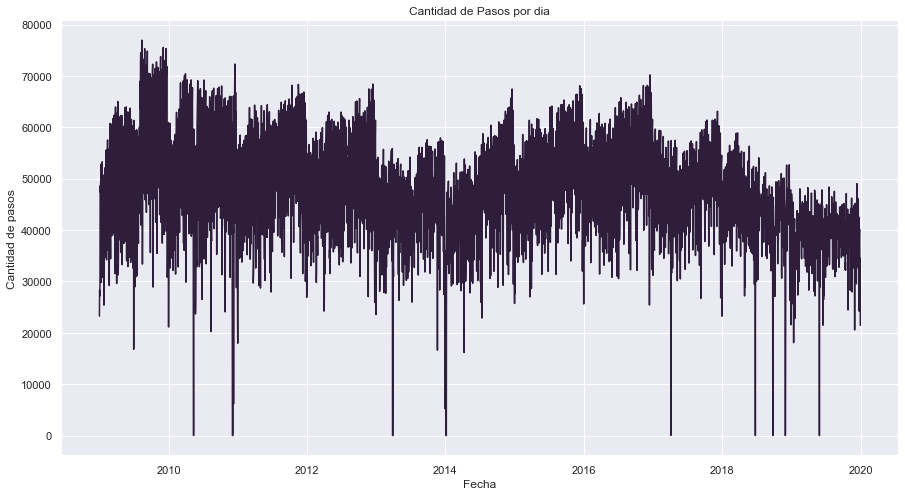

In [149]:
plt.figure(figsize = (15,8))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title("Cantidad de Pasos por dia")
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

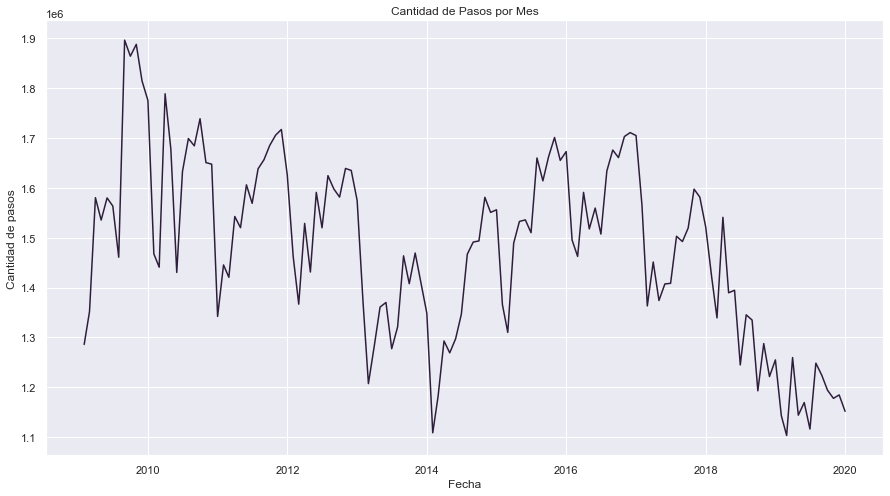

In [150]:
plt.figure(figsize = (15,8))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.title("Cantidad de Pasos por Mes")
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

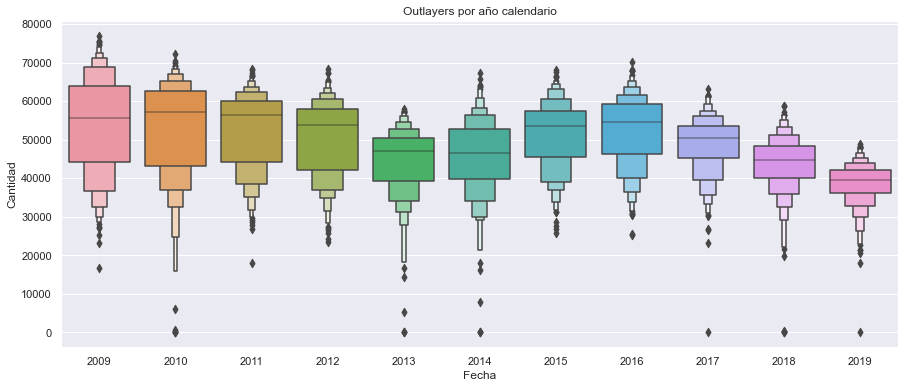

In [151]:
plt.figure(figsize=(15,6))
plt.title('Outlayers por año calendario')
sns.boxenplot(x=diario.index.year, y =diario.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.show()

In [152]:
diario.cantidad_pasos[diario.cantidad_pasos< 10] = np.nan

In [154]:
diario = diario.interpolate(method='time')

<AxesSubplot:xlabel='fecha'>

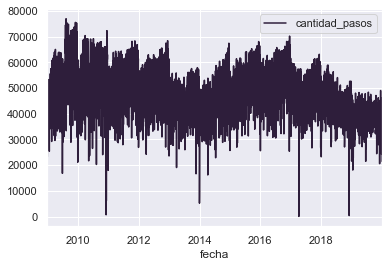

In [157]:
diario.plot()

In [159]:
## Eliminamos valores outlayers del dataframe diario 
## Funciones para eliminar outlayers 
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [160]:
diario=remove_outliers(diario,'cantidad_pasos')

<AxesSubplot:xlabel='fecha'>

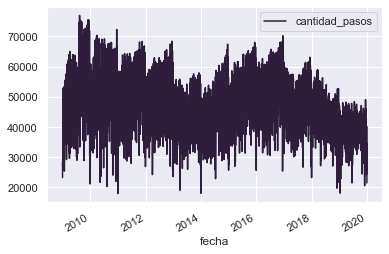

In [161]:
diario.plot()

In [183]:
all_days = pd.date_range(diario.index.min(), diario.index.max(), freq='D')
diario=diario.reindex(all_days)

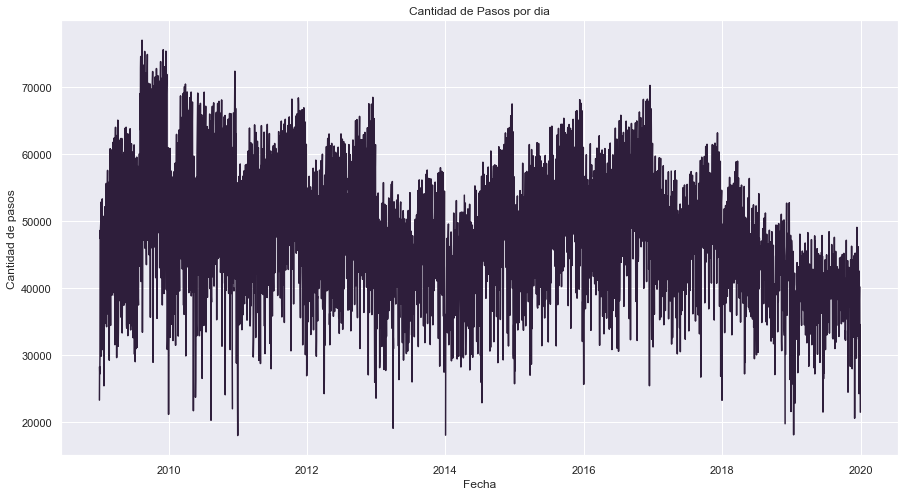

In [185]:
plt.figure(figsize = (15,8))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title("Cantidad de Pasos por dia")
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

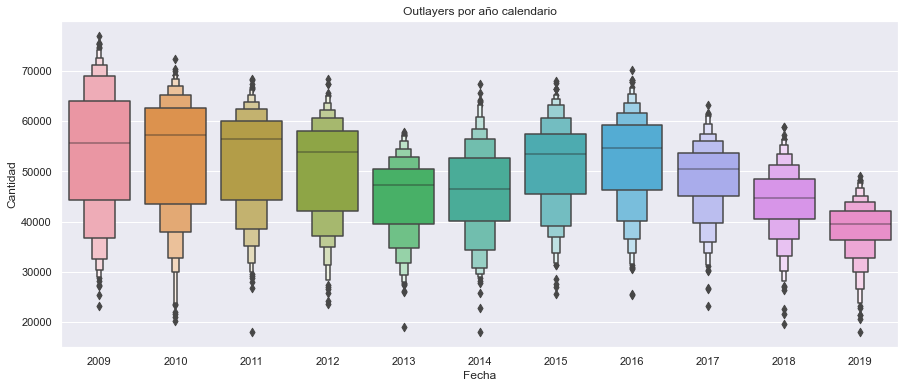

In [186]:
plt.figure(figsize=(15,6))
plt.title('Outlayers por año calendario')
sns.boxenplot(x=diario.index.year, y =diario.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.show()

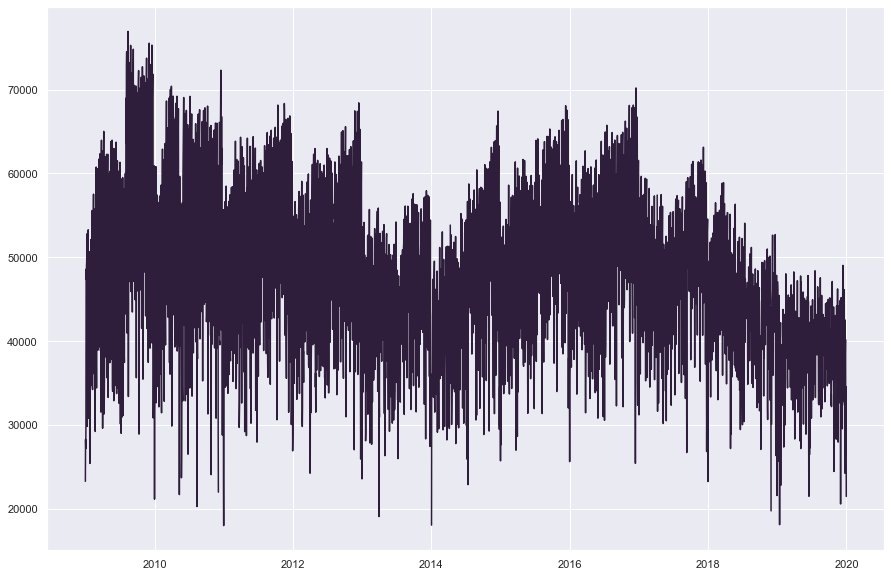

In [187]:
plt.figure(figsize=(15,10))
plt.plot(diario.index, diario.cantidad_pasos)
plt.show()

Hasta este momento hemos realizado todas las tranformaciones necesarias sobre el dataset diario. Solo faltaria eliminar la informacion del 2020 ya que es atipica a la serie. Para este periodo de tiempo vamos a relizar una prediccion y ella se va a tomar como base par estimar los años siguiente. 

In [188]:
diario = diario[diario.index.year <2020]

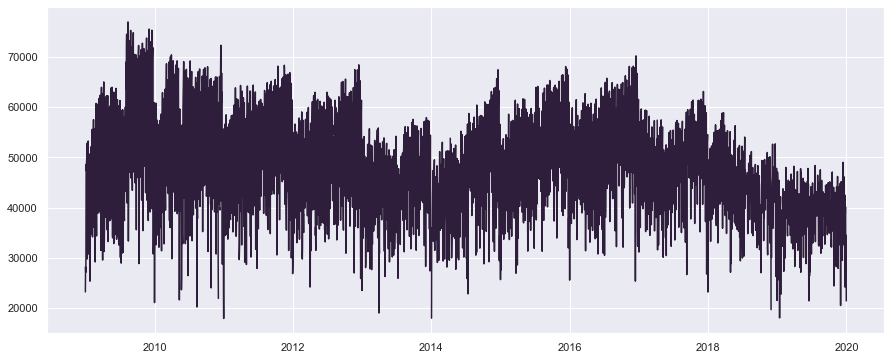

In [189]:
plt.figure(figsize=(15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.show()

In [193]:
diario['fecha']=diario.index

In [194]:
## Vamos a almacenar esta serie para tomarla como input apr todos los modelos
diario.to_csv('Diariofinal.csv')
semanal.to_csv('Semanal.csv')
mensual.to_csv('Mensual.csv')